<a href="https://colab.research.google.com/github/SSSpock/skillspire/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Section 1: Introduction to Regression

Topic Review
Regression analysis is a powerful statistical method used to study relationships between variables. It helps us understand how one or more independent variables (also known as predictors or explanatory variables) affect a dependent variable (also known as the response or outcome variable). In this lesson, we will focus on linear regression, which assumes a linear relationship between variables.

There are several types of regression, including:

Simple linear regression: one independent variable and one dependent variable.
Multiple linear regression: multiple independent variables and one dependent variable.
Polynomial regression: a nonlinear relationship between independent and dependent variables.
Regression is widely used in various fields, such as finance, economics, marketing, and more. Some applications include predicting stock prices, estimating the impact of marketing campaigns on sales, and analyzing the relationship between socioeconomic factors and health outcomes.

Coding Example: Importing Libraries and Loading Sample Dataset
First, let's import the necessary libraries and load a sample dataset to work with throughout this lesson.

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load sample dataset: Advertising data (source: "An Introduction to Statistical Learning")
url = "https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv"
data = pd.read_csv(url, index_col=0)

# Display the first few rows of the dataset
data.head()


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


This dataset contains information about the advertising budget (in thousands of dollars) for TV, radio, and newspaper ads, and the corresponding sales (in thousands of units) for 200 different markets. In this lesson, we will explore the relationship between TV advertising budget and sales.

Section 2: Simple Linear Regression: Theory

Topic Review
Simple linear regression is a method that models the linear relationship between one independent variable (X) and one dependent variable (Y). The goal is to find the line that best fits the data points, which can be represented by the following equation:

Y = β0 + β1X + ε

Y: dependent variable (response)

X: independent variable (predictor)

β0: intercept (value of Y when X = 0)

β1: slope (change in Y per unit increase in X)

ε: random error term (difference between actual and predicted values)

The best-fitting line is determined using the least squares method, which minimizes the sum of squared differences between the actual (observed) and predicted values of the dependent variable.

There are several assumptions underlying simple linear regression:

Linearity: The relationship between X and Y is linear.

Independence: The observations are independent of each other.

Homoscedasticity: The variance of the error term is constant for all values of X.

Normality: The error term follows a normal distribution.


Coding Example: Creating a Scatter Plot to Visualize the Relationship between Two Variables

Let's create a scatter plot of TV advertising budget (X) against sales (Y) to visualize the relationship between the two variables.

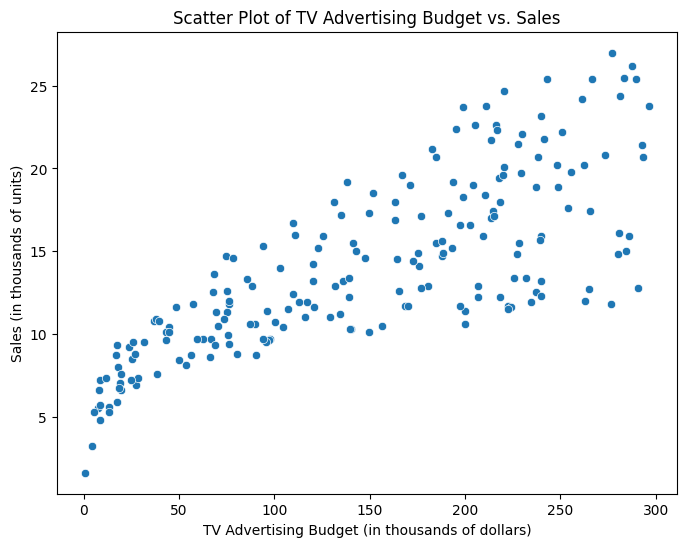

In [4]:
# Scatter plot of TV advertising budget vs. sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TV', y='Sales', data=data)
plt.xlabel('TV Advertising Budget (in thousands of dollars)')
plt.ylabel('Sales (in thousands of units)')
plt.title('Scatter Plot of TV Advertising Budget vs. Sales')
plt.show()


From the scatter plot, we can observe a positive linear relationship between TV advertising budget and sales, which means that as the budget for TV ads increases, sales tend to increase as well.


# Section 3: Simple Linear Regression: Statsmodels

Topic Review
Statsmodels is a Python library that provides a comprehensive suite of statistical models for various analyses, including regression. In this section, we'll use Statsmodels to perform simple linear regression on our sample dataset.

Coding Example 1: Fitting a Simple Linear Regression Model using Statsmodels
To fit a simple linear regression model using Statsmodels, we'll follow these steps:

Prepare the data: separate the independent variable (X) and dependent variable (Y), and add a constant term to the independent variable.
Create an OLS (Ordinary Least Squares) model object.
Fit the model to the data.

In [6]:
# Prepare the data
X = data['TV']
Y = data['Sales']
X = sm.add_constant(X)  # Add a constant term to the independent variable

# Create an OLS model object
model = sm.OLS(Y, X)

# Fit the model to the data
results = model.fit()


# Coding Example 2: Interpreting the Regression Results Summary
Now that we've fitted the model, let's take a look at the regression results summary.

In [7]:
# Display the regression results summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           1.47e-42
Time:                        23:49:45   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In the regression results summary, you'll find several important pieces of information, including:

R-squared: the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
Adj. R-squared: the adjusted R-squared, which adjusts for the number of predictors in the model.
coef: the estimated coefficients for the model (β0 and β1 in our case).
std err: the standard error of the coefficient estimates.
t: the t-statistic, which tests the null hypothesis that the coefficient is equal to zero.
P>|t|: the p-value, which helps us determine if the coefficient is statistically significant (typically, a p-value below 0.05 indicates statistical significance).


# Coding Example 3: Visualizing the Regression Line on a Scatter Plot
Finally, let's visualize the fitted regression line on a scatter plot of the data.

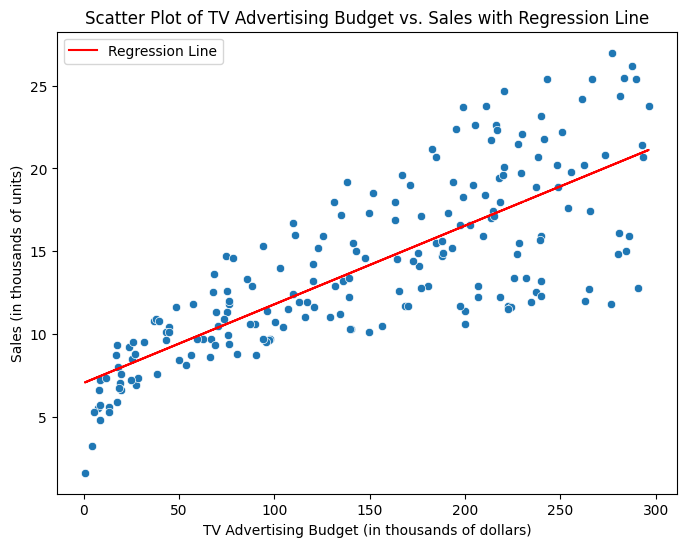

In [8]:
# Scatter plot of TV advertising budget vs. sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TV', y='Sales', data=data)
plt.xlabel('TV Advertising Budget (in thousands of dollars)')
plt.ylabel('Sales (in thousands of units)')
plt.title('Scatter Plot of TV Advertising Budget vs. Sales with Regression Line')

# Plot the regression line
regression_line = results.params[0] + results.params[1] * data['TV']
plt.plot(data['TV'], regression_line, color='red', label='Regression Line')
plt.legend()

plt.show()


# Section 4: Assessing Model Performance

Topic Review
Once we've fitted a regression model, it's important to assess its performance. There are several metrics that can help us evaluate the model's performance, such as R-squared, adjusted R-squared, and other performance metrics like mean squared error (MSE) and root mean squared error (RMSE).

R-squared: The proportion of the variance in the dependent variable that is predictable from the independent variable(s). R-squared ranges from 0 to 1, with higher values indicating better model performance.

Adjusted R-squared: The adjusted R-squared adjusts for the number of predictors in the model. It is useful when comparing models with different numbers of predictors.

Mean Squared Error (MSE): The average of the squared differences between the actual and predicted values. Lower values indicate better model performance.

Root Mean Squared Error (RMSE): The square root of the mean squared error. Lower values indicate better model performance.

Coding Example: Extracting Performance Metrics from the Statsmodels Regression Results

We can extract the R-squared and adjusted R-squared values from the regression results summary. 

Additionally, we can calculate the mean squared error (MSE) and root mean squared error (RMSE) using the residuals (differences between the actual and predicted values) provided by the Statsmodels results object.

In [ ]:
# Extract R-squared and adjusted R-squared
r_squared = results.rsquared
adj_r_squared = results.rsquared_adj

# Calculate mean squared error (MSE) and root mean squared error (RMSE)
mse = np.mean(results.resid ** 2)
rmse = np.sqrt(mse)

# Display performance metrics
print(f"R-squared: {r_squared:.3f}")
print(f"Adjusted R-squared: {adj_r_squared:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")


# Topic Review: Residuals in Linear Regression Analysis
Residuals are the differences between the actual (observed) values of the dependent variable and the predicted values obtained from the regression model. They play a crucial role in linear regression analysis, as they help us evaluate the model's performance and validate the underlying assumptions.

In simple linear regression, residuals can be represented as:

Residual = Observed Value - Predicted Value
= Y - (β0 + β1X)

Residuals are used for several purposes in linear regression analysis:

Assessing model performance: The sum of squared residuals (or mean squared error) is used to determine the best-fitting line in the least squares method. Smaller residual values indicate better model performance.

Validating model assumptions: By examining residual plots, we can check the assumptions of linearity, independence, homoscedasticity, and normality. Any violation of these assumptions may indicate the need for a different model or data transformation.

Identifying outliers or influential points: Large residuals may indicate the presence of outliers or influential points that can significantly affect the regression model. Such points may need further investigation or removal from the analysis.

# Coding Example: Generating and Evaluating a Residual Plot

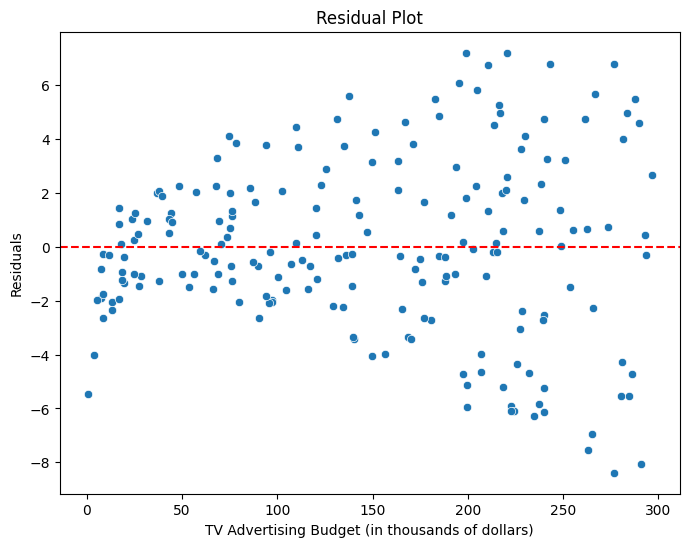

In [9]:
# Calculate residuals
residuals = results.resid

# Create a residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['TV'], y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('TV Advertising Budget (in thousands of dollars)')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.show()


# Evaluating the residual plot:

Linearity: The residuals should be randomly scattered around the horizontal axis (y = 0) without any clear pattern. If there is a pattern, it may indicate that a linear model is not suitable for the data. In our case, there doesn't seem to be a clear pattern, suggesting that the linearity assumption is reasonable.

Independence: The residuals should not display any discernible trends or patterns, as this could indicate that the observations are not independent. In our plot, the residuals appear to be randomly scattered, supporting the independence assumption.

Homoscedasticity: The spread of the residuals should be approximately constant across all values of the independent variable. If the spread changes, it may indicate that the error term does not have constant variance (heteroscedasticity). In our case, the spread of the residuals appears to be relatively constant, supporting the homoscedasticity assumption.

Normality: Although it's difficult to assess normality from the residual plot alone, a histogram or Q-Q plot of the residuals can provide insights into the normality of the error term. If the residuals are not normally distributed, it may be necessary to transform the data or use a different model.



# Coding Example: Generating and Evaluating a Q-Q Plot of the Residuals

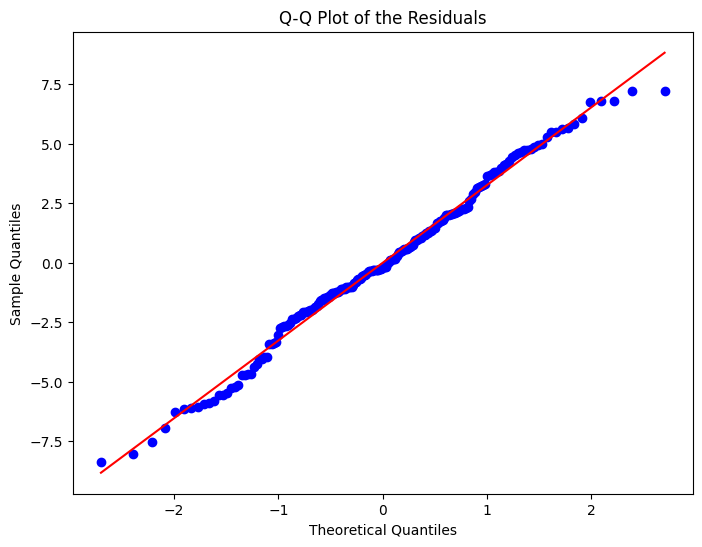

In [10]:
import scipy.stats as stats

# Create a Q-Q plot of the residuals
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot of the Residuals')

plt.show()


# Evaluating the Q-Q plot:

Normality: The Q-Q plot compares the distribution of the residuals to a normal distribution. If the residuals are normally distributed, the points should roughly fall along the diagonal reference line. In our case, the points on the Q-Q plot mostly follow the reference line, suggesting that the normality assumption is reasonable.


# Section 5: Questions to Test Student Understanding

What is simple linear regression, and what is its purpose?

What is the equation for a simple linear regression model? Briefly describe each term in the equation.

List the four assumptions underlying simple linear regression, and explain why they are important.

Describe the process of fitting a simple linear regression model using Statsmodels in Python.

What are residuals in linear regression analysis, and why are they important?

How can we assess the performance of a simple linear regression model? List some common performance metrics.

What is the role of a residual plot in linear regression analysis, and what can we learn from it?

How can we use a Q-Q plot to test the normality assumption in linear regression analysis?

If the assumptions of simple linear regression are violated, what are some possible steps to address the issue?

